In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [5]:
!pip install neattext
# Load Text Cleaning Pkgs
import neattext.functions as nfx

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for neattext from https://files.pythonhosted.org/packages/ca/69/320062a5980ec9b6383bb9caf2a335e0f177164a2e7dd1d98f967b07e1c7/neattext-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/114.7 kB ? eta -:--:--
   ------ -------------------------------- 20.5/114.7 kB 640.0 kB/s eta 0:00:01
   ---------------------------- ----------- 81.9/114.7 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 114.7/114.7 kB 1.3 MB/s eta 0:00:00


In [6]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [8]:

# Load Dataset
df = pd.read_csv("./textEmotionDataSet.csv")

In [9]:

df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [10]:

# Value Counts
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

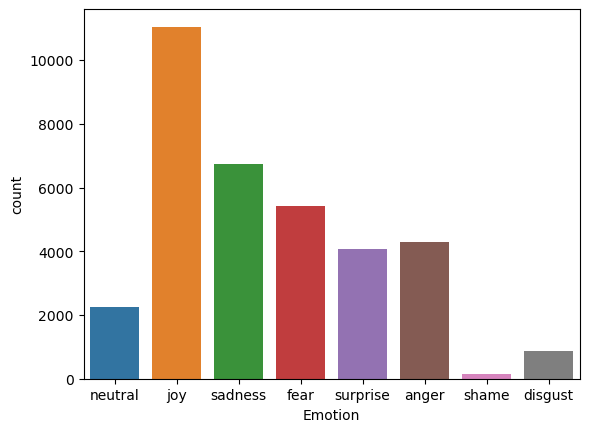

In [11]:

# Plot
sns.countplot(x='Emotion',data=df)

In [12]:

# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [13]:

# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [14]:

# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [15]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,34789,anger,A man robbed me today .,man robbed today .
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [16]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [17]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)


In [18]:

# Build Pipeline
from sklearn.pipeline import Pipeline

In [19]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [20]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [21]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [22]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.619946349875455

In [23]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [24]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [25]:

# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.60505633e-03, 7.06449069e-03, 6.95651829e-03, 9.43810920e-01,
        1.00440602e-04, 2.63231794e-02, 6.63273098e-05, 1.40730670e-02]])

In [26]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [27]:

# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [42]:
from joblib import load

# Load the model
model = load('emotion_classifier_pipe_lr_03_june_2021.pkl')

In [46]:
model.predict({"i hate you"})

array(['anger'], dtype=object)

In [31]:
print(len(df))

34792


In [51]:
df

,Unnamed: 0,Emotion,Text,Clean_Text,text2,modelPrediction
0,0,neutral,Why ?,?,Why ?,neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.,Sage Act upgrade on my to do list for tommorow.,joy
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,disgust
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...,Such an eye ! The true hazel eye-and so brill...,fear
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,surprise
...,...,...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol,NaN,NaN
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!,NaN,NaN
34789,34789,anger,A man robbed me today .,man robbed today .,NaN,NaN
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU...",NaN,NaN


In [56]:
500%100==0

True

In [58]:
for i in range(0,len(df)):
    textValue = df.loc[i, 'Text']
    output=model.predict({textValue})
    # print(output)
    if (i%1000==0) :
        print("Done for ",i)
    df.loc[i, 'modelPrediction'] = output[0]

Done for  0
Done for  1000
Done for  2000
Done for  3000
Done for  4000
Done for  5000
Done for  6000
Done for  7000
Done for  8000
Done for  9000
Done for  10000
Done for  11000
Done for  12000
Done for  13000
Done for  14000
Done for  15000
Done for  16000
Done for  17000
Done for  18000
Done for  19000
Done for  20000
Done for  21000
Done for  22000
Done for  23000
Done for  24000
Done for  25000
Done for  26000
Done for  27000
Done for  28000
Done for  29000
Done for  30000
Done for  31000
Done for  32000
Done for  33000
Done for  34000


In [59]:
df

,Unnamed: 0,Emotion,Text,Clean_Text,text2,modelPrediction
0,0,neutral,Why ?,?,Why ?,neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.,Sage Act upgrade on my to do list for tommorow.,joy
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,disgust
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...,Such an eye ! The true hazel eye-and so brill...,fear
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,surprise
...,...,...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol,NaN,surprise
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!,NaN,joy
34789,34789,anger,A man robbed me today .,man robbed today .,NaN,sadness
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU...",NaN,sadness


In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
Y_axis = df.iloc[30000:, [1, 5]]
y_actual= Y_axis["Emotion"]
y_predicted = Y_axis["modelPrediction"]
y_predicted
cm= confusion_matrix(y_actual, y_predicted)
print(cm)

[[ 374   10   47   66    5   63    0   26]
 [   6   49    9   17    0    7    0   13]
 [  16    2  613   62    2   37    0   15]
 [  27    2   72 1223   13  117    0   63]
 [   4    0   16   60  161   46    0   11]
 [  34   10   77  139    5  638    1   44]
 [   0    1    2    1    0    0    5    1]
 [  16    4   19  107    2   52    0  380]]


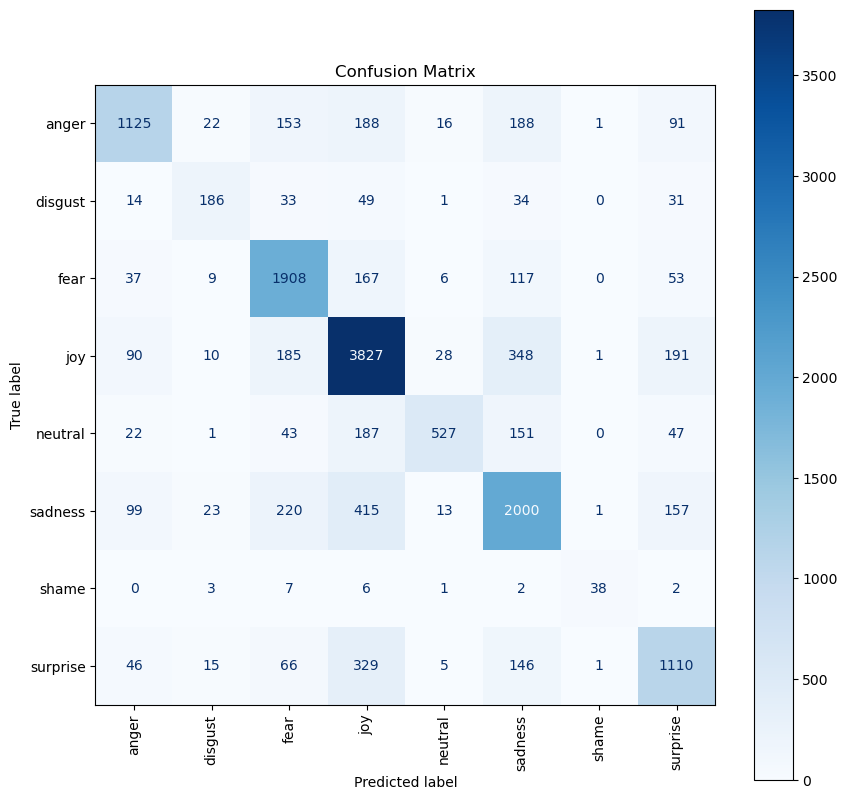

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Create a confusion matrix
cm = confusion_matrix(y_actual, y_predicted)

# Define the labels
labels = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame', 'surprise']

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')

plt.title('Confusion Matrix')
plt.show()

In [61]:
df["Text"]

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object